In [1]:
# correlation and autocorrelations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
amazon = pd.read_csv('Data/AMZN.csv', parse_dates = ['Date'])
amazon.index = amazon['Date']
amazon = amazon.drop('Date', 1)
amazon.columns = ['amzn']
amazon.head()

,amzn
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


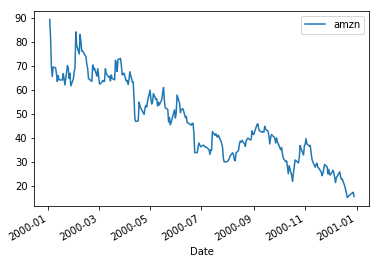

In [26]:
# plot
amazon['2000'].plot()
plt.show()

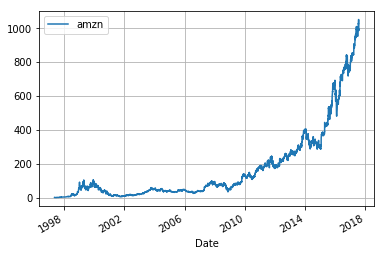

In [27]:
amazon.plot(grid = True)
plt.show()

In [24]:
# merging time series with different dates
msft = pd.read_csv('Data/MSFT.csv', parse_dates = ['Date'])
msft.index = msft['Date']
msft = msft.drop('Date', 1)
msft.columns = ['msft']
msft.head(3)

,msft
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896


In [28]:
set_msft_dates = set(msft.index)
set_amazon_dates = set(amazon.index)

In [29]:
# show difference
print(set_msft_dates - set_amazon_dates)

{Timestamp('2017-08-04 00:00:00'), Timestamp('2017-08-03 00:00:00')}


In [30]:
two_stocks = amazon.join(msft, how = 'inner')
two_stocks.head(3)

,amzn,msft
Date,,
2012-08-06,233.990005,26.107651
2012-08-07,236.559998,26.377876
2012-08-08,234.380005,26.438896


In [31]:
# correlations of two stocks

In [34]:
returns = two_stocks.pct_change()
correlation = returns['amzn'].corr(returns['msft'])
print('Correlation: ', correlation)

Correlation:  0.37790976628577627


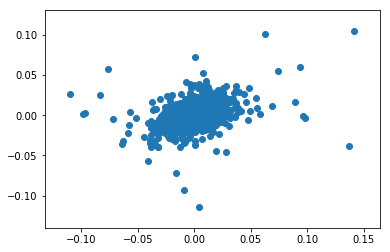

In [35]:
# scatter plot
plt.scatter(returns['amzn'], returns['msft'])
plt.show()

In [39]:
# regression and R-squared
import statsmodels.api as sm

In [40]:
correlation = returns['amzn'].corr(returns['msft'])
correlation

0.37790976628577627

In [44]:
x = pd.DataFrame(two_stocks, columns=['amzn'])
x = sm.add_constant(x)

y = pd.DataFrame(two_stocks, columns = ['msft'])

In [45]:
result = sm.OLS(y, x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   msft   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     9150.
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:02:06   Log-Likelihood:                -3681.8
No. Observations:                1256   AIC:                             7368.
Df Residuals:                    1254   BIC:                             7378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0833      0.303     56.385      0.0

In [47]:
# autocorrelation
msft = msft.resample(rule = 'W').last()
returns = msft.pct_change()

In [49]:
autocorrelation = returns['msft'].autocorr()
autocorrelation

-0.1568132021808809

In [50]:
# daily changes
msft['daily_change'] = msft.diff()
autocorrelation_daily = msft['daily_change'].autocorr()
autocorrelation_daily

-0.13683594476630337

In [51]:
# annual changes
annual_msft = msft['msft'].resample(rule = 'A').last()
annual_msft['annual_change'] = annual_msft.diff()
autocorrelation_annual = annual_msft['annual_change'].autocorr()
autocorrelation_annual

0.05246800995063831